# Fourier transform analysis

The Discrete Fourie Transformation (DFT) is a mathematical method for converting a finite function to a same length sequence. It is used to analyze physical amplitude-time or intensity-time data. Furthermore, it is also used for when the wave is not known to be periodic or nonperiodic. In addition to the DFT, a power spectrum is created by summing together the real and imaginary parts of a function. The power spectrum is used to tune the signal which is a distribution of a time series in the frequency domain.


Please note that the code takes about 1 to 2 minutes to run

The values for v1, v2 and v3 are  100 200 400 respectively


<function matplotlib.pyplot.show(close=None, block=None)>

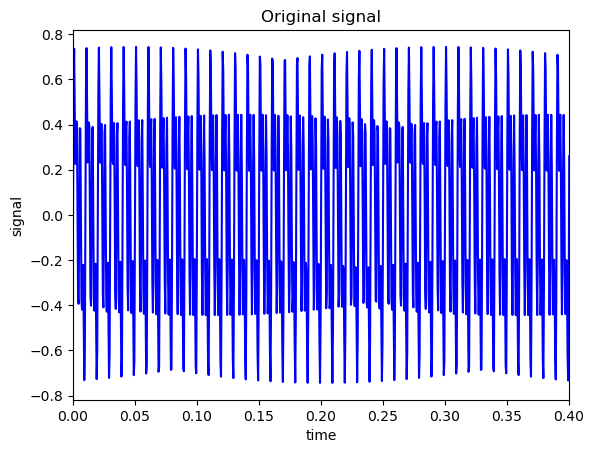

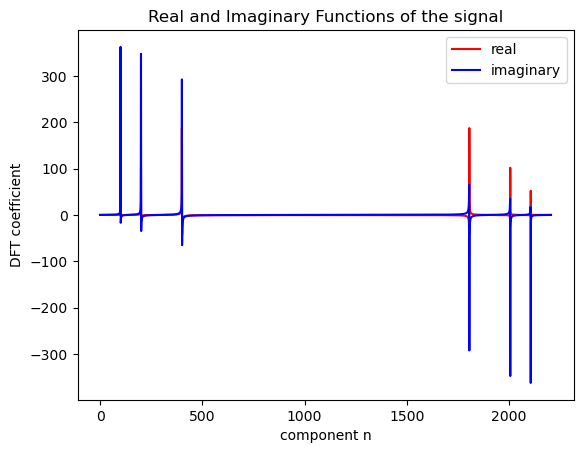

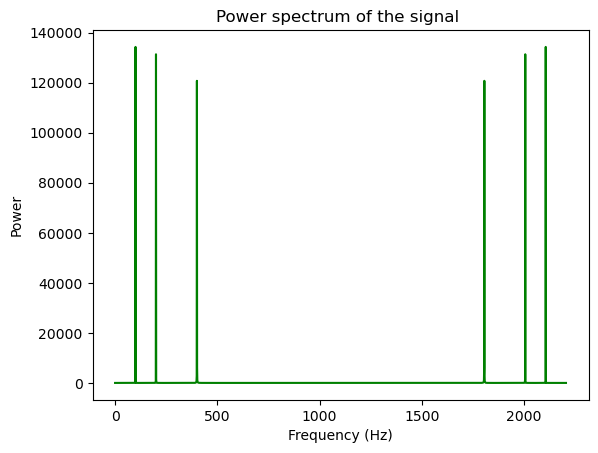

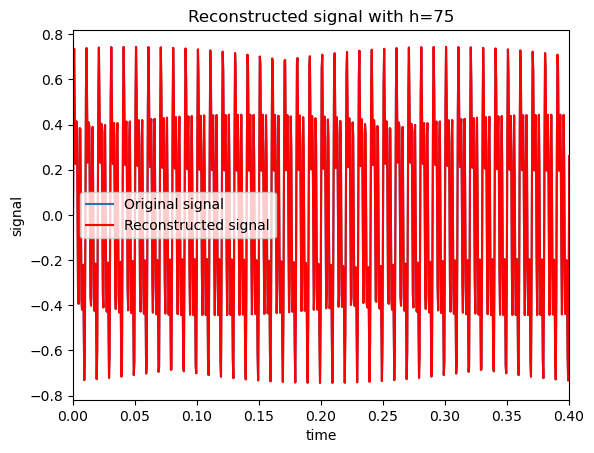

In [ ]:
import matplotlib.pylab as plt
import math
import numpy as np
from scipy.signal import find_peaks


# Importing the signal and reading of the text file
data = np.loadtxt('superposition_signal.txt',float)
time_data = data[:,0]
sound_data = data[:,1]
time = np.arange(0,1023,1)


#Plotting the original signal
plt.figure()
plt.title("Original signal")
plt.plot(time_data, sound_data, 'b-')
plt.xlabel("time")
plt.ylabel("signal")
plt.xlim(0,0.4)
plt.show

# Defining functions for finding the real and imaginary components of the signal
def real(f,m,n,t):
    return f*np.cos((2*np.pi*m*n)/N)

def img (f,m,n,t):
    return f*np.sin((2*np.pi*m*n)/N)

# Setting up parameters and lists
h = 75
N = len(sound_data) 
tau = N * h
n = np.arange(N)
m = np.arange(N)

# Creation of empty list to store the values for the real and imaginary components
realList = []
imgList = []

# Calculating all real and imaginary components 
for x in n:
    realsum = []
    fakesum = []
    sumr = 0
    sumi = 0
    for y in m:
        t = y*h
        realsum.append(real(sound_data[y],y,x,t))
        fakesum.append(img(sound_data[y],y,x,t))
    for rr in realsum:
        sumr = sumr + rr
    for ii in fakesum:
        sumi = sumi + ii
    realList.append(sumr)
    imgList.append(sumi)
    
# Plotting of the real and imaginary components for the signal  
plt.figure()
plt.title("Real and Imaginary Functions of the signal")
plt.plot(n,realList, "r-", label = 'real')
plt.plot(n,imgList, 'b-', label = 'imaginary') 
plt.xlabel("component n")
plt.ylabel("DFT coefficient")
plt.legend()
plt.show


# Calculation and plotting of the power spectrum for the signal
powerlist1 = []
arraylist = np.array(powerlist1)
for r in realList:
    for i in imgList:
        if realList.index(r) == imgList.index(i):
            powerlist1.append(r**2+i**2)
            
peaks, _ = find_peaks(powerlist1, height = 100000)
print("The values for v1, v2 and v3 are ", peaks[0], peaks[1], peaks[2] , "respectively")            

# Plotting of the power spectrum
plt.figure()
plt.title("Power spectrum of the signal ")
plt.plot(n,powerlist1, "g-",)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.show


# Reconstructing the signal
Freal_recon = []
Fimg_recon = []
for mx in range(N):
    Freal = 0
    Fimg = 0
    for nx in range(N):
        Freal += realList[nx]*np.cos(2*np.pi*nx*mx/N)
        Fimg += imgList[nx]*np.sin(2*np.pi*nx*mx/N)
    Freal_recon.append(Freal/N)
    Fimg_recon.append(Fimg/N)
   
# Plotting of the reconstructed signal 
plt.figure()
plt.title("Reconstructed signal with h="+str(h))
plt.plot(time_data, sound_data,label = "Original signal")
plt.plot(time_data,np.asarray(Freal_recon)+ np.asarray(Fimg_recon), "r-", label = 'Reconstructed signal')
plt.xlabel("time")
plt.ylabel("signal")
plt.xlim(0,0.4)
plt.legend()
plt.show


The values for the frequency of the sine wave; v1, v2 and v3 are 100, 200 400 respectively 